a= -63.664080920350784 +- 0.02292507928985912
t= 1.2353533112004147 +- 0.0035399951947121945
a_2= -16.079285082660192 +- 0.020387476238860742
t_2= -0.042004469867320426 +- 0.003537828993500792


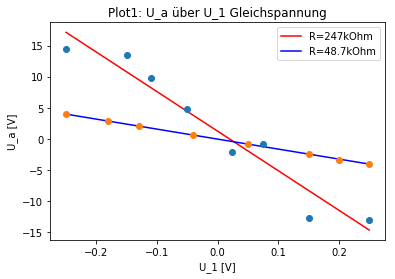

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.optimize import curve_fit

def fit_func(x,a,t):
    return a*x+t
 
U_1 = np.array([-250,-150,-110,-50,23,75,150,250])*1e-3
U_a = np.array([14.4,13.5,9.82,4.78,-2.09,-0.78,-12.8,-13])

U_1_err=1e-3*np.ones(len(U_1))
U_a_err=0.01*np.ones(len(U_a))

U_1_2 = np.array([-250,-180,-130,-40,50,150,200,250])*1e-3 #Rg=48.7kOhm
U_a_2 = np.array([4,2.8,2.07,0.6,-0.8,-2.47,-3.34,-4])

U_1_err2=1e-3*np.ones(len(U_1))
U_a_err2=0.01*np.ones(len(U_a))

plt.errorbar(U_1,U_a,xerr=U_1_err,yerr=U_a_err,fmt="o",capsize=2)
popt,pcov=curve_fit(fit_func,U_1,U_a,sigma=U_a_err,absolute_sigma=True)

plt.errorbar(U_1_2,U_a_2,xerr=U_1_err2,yerr=U_a_err2,fmt="o",capsize=2)
popt2,pcov2=curve_fit(fit_func,U_1_2,U_a_2,sigma=U_a_err2,absolute_sigma=True)

print("a=", popt[0], "+-", np.sqrt(pcov[0][0]))
print("t=", popt[1], "+-", np.sqrt(pcov[1][1]))

print("a_2=", popt2[0], "+-", np.sqrt(pcov2[0][0]))
print("t_2=", popt2[1], "+-", np.sqrt(pcov2[1][1]))

plt.plot(U_1,fit_func(U_1,popt[0],popt[1]),'r',label='R=247kOhm')
plt.plot(U_1_2,fit_func(U_1_2,popt2[0],popt2[1]),'b',label='R=48.7kOhm')
plt.title('Plot1: U_a über U_1 Gleichspannung')
plt.xlabel('U_1 [V]')
plt.ylabel ('U_a [V]')
plt.legend()
plt.savefig("Plot1.pdf",format="pdf")

a= 75.43351463128356 +- 0.18009135433828816
t= -0.0009513941951624361 +- 0.008020341739979175
a2= 194.92972120591583 +- 0.18009003163932258
t2= -0.18897252530099448 +- 0.008020243090157232


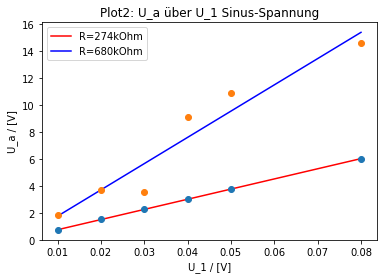

In [3]:
#Wiederstand R=274kOhm Gegenkopplung Sinus-Spannung

U_g=np.array([100,200,300,400,500,800])*1e-3
U_a=np.array([0.744,1.520,2.280,3.000,3.76,6.04])
U_1=U_g/10

U_g2= np.array([100,200,300,500,600,800])*1e-3 #R=680 kOhm
U_a2=np.array([1.84,3.72,3.52,9.12,10.90,14.6])
U_1_2=U_g/10

U_g_err=1e-3*np.ones(len(U_g))
U_a_err=0.01*np.ones(len(U_a))
U_1_err=U_g_err/10

plt.errorbar(U_1,U_a,xerr=U_1_err,yerr=U_a_err,fmt="o",capsize=2)
popt,pcov=curve_fit(fit_func,U_1,U_a,sigma=U_a_err,absolute_sigma=True)

plt.errorbar(U_1_2,U_a2,xerr=U_1_err,yerr=U_a_err,fmt="o",capsize=2)
popt2,pcov2=curve_fit(fit_func,U_1_2,U_a2,sigma=U_a_err,absolute_sigma=True)

print("a=", popt[0], "+-", np.sqrt(pcov[0][0]))
print("t=", popt[1], "+-", np.sqrt(pcov[1][1]))
print("a2=", popt2[0], "+-", np.sqrt(pcov2[0][0]))
print("t2=", popt2[1], "+-", np.sqrt(pcov2[1][1]))


plt.plot(U_1,fit_func(U_1,popt[0],popt[1]),'r',label='R=274kOhm')
plt.plot(U_1_2,fit_func(U_1_2,popt2[0],popt2[1]),'b',label='R=680kOhm')
plt.title('Plot2: U_a über U_1 Sinus-Spannung')
plt.xlabel('U_1 / [V]')
plt.ylabel ('U_a / [V]')
plt.legend()
plt.savefig("Plot2.pdf",format="pdf")

In [4]:
#Messdaten Teil 2 

def getdata_2a_RG1():
    
    RG1 = 680*1000
    f = np.array([100,400,1000,1400,1700,2000,10000,30000,80000,120000,220000,300000])
    Df = 0
    V = np.array([194.7,193.3,183.3,174.7,168,160,56.7,19.01,7.3,4.93,2.74,2.02])
    DV = np.array([0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.004,0.004,0.004,0.004,0.0004])
    return f, Df, V, DV

def getdata_2a_RG2():
    
    RG2 = 274*1000
    f = np.array([100,400,1000,1400,1700,2000,10000,30000,80000,120000,220000,300000])
    Df = 0
    V = np.array([76.7,76.0,75.3,74.7,74.3,74,44.7,18.1,7.1,4.97,2.92,2.03])
    DV = np.array([0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.004,0.004,0.004,0.004,0.0004])
    return f, Df, V, DV

def getdata_2a_RG3():
    
    RG3 = 48.7*1000
    f = np.array([100,400,1000,1400,1700,2000,10000,30000,80000,120000,220000,300000])
    Df = 0
    V = np.array([13.3,13.3,13.3,13.3,13.3,13.3,13,10.6,6.04,4.36,2.50,1.86])
    DV = np.array([0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.004,0.004,0.004,0.004,0.004])
    return f, Df, V, DV

def getdata_2b_RG3_K1():
    
    C = 560*1e-12
    RG = 48.7*1000
    f = np.array([100,400,1000,1400,1700,2000,10000,30000,80000,120000,220000,300000])
    Df = 0
    V = np.array([133,133,132,130,129,126,67.6,26.2,10.2,6.92,4.16,3.30])
    DV = np.array([0.04,0.04,0.04,0.04,0.04,0.04,0.004,0.004,0.004,0.0004,0.0004,0.0004])
    return f, Df, V, DV

def getdata_2c_RG3_K2():
    
    C = 47*1e-9
    RG = 48.7*1000 
    f = np.array([300,700,1000,1500,2000,5000,10000,15000,20000])
    Df = 0
    V = np.array([3.88,7.60,9.28,11,11.9,13.2,13.0,12.6,12.1])
    DV = np.array([0.004,0.004,0.004,0.04,0.04,0.04,0.04,0.04])
    return f, Df, V, DV    

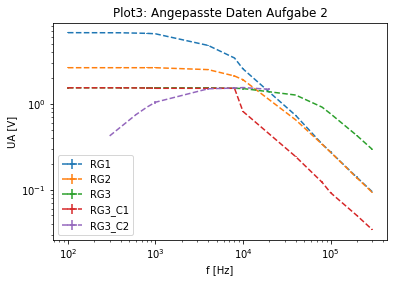

In [8]:
#Plotten der Daten aus Aufgabe 2 

x, Dx, y, Dy = getdata_2a_RG1()
plt.errorbar(x,y,Dy,Dx,fmt='--',label = 'RG1')
x, Dx, y, Dy = getdata_2a_RG2()
plt.errorbar(x,y,Dy,Dx,fmt='--',label = 'RG2')
x, Dx, y, Dy = getdata_2a_RG3()
plt.errorbar(x,y,Dy,Dx,fmt='--',label = 'RG3')
x, Dx, y, Dy = getdata_2b_RG3_K1()
plt.errorbar(x,y,Dy,Dx,fmt='--',label = 'RG3_C1')
x, Dx, y, Dy = getdata_2c_RG3_K2()
plt.errorbar(x,y,Dy,Dx,fmt='--',label = 'RG3_C2')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('UA [V]')
plt.xlabel('f [Hz]')
plt.title('Plot3: Angepasste Daten Aufgabe 2')
plt.savefig('Plot3.pdf',format = 'pdf')